<a href="https://www.kaggle.com/code/aleksandrmorozov123/computer-vision-algorithms?scriptVersionId=177862265" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-image-recognition-tutorial/building_2.jpg
/kaggle/input/google-image-recognition-tutorial/building_1.jpg
/kaggle/input/google-image-recognition-tutorial/building_3.jpg
/kaggle/input/google-image-recognition-tutorial/roma_1.jpg
/kaggle/input/google-image-recognition-tutorial/roma_2.jpg
/kaggle/input/aggressive-behavior-video-classification/aggressive_behavior.csv
/kaggle/input/aggressive-behavior-video-classification/files/aggressive/3.mp4
/kaggle/input/aggressive-behavior-video-classification/files/aggressive/1.mp4
/kaggle/input/aggressive-behavior-video-classification/files/aggressive/4.mp4
/kaggle/input/aggressive-behavior-video-classification/files/aggressive/0.mp4
/kaggle/input/aggressive-behavior-video-classification/files/aggressive/2.mp4
/kaggle/input/aggressive-behavior-video-classification/files/non_aggressive/5.mp4
/kaggle/input/aggressive-behavior-video-classification/files/non_aggressive/3.mp4
/kaggle/input/aggressive-behavior-video-classification/files

**SIFT** 
The Scale-Invariant Feature Transform (SIFT) algorithm is a computer vision algorithm used for identifying and matching local features, such as corners or blobs, in images. It was first described in a paper by David Lowe in 1999. The SIFT algorithm is invariant to image scale and rotation. SIFT is widely used in image matching, object recognition and image registration apllications. 

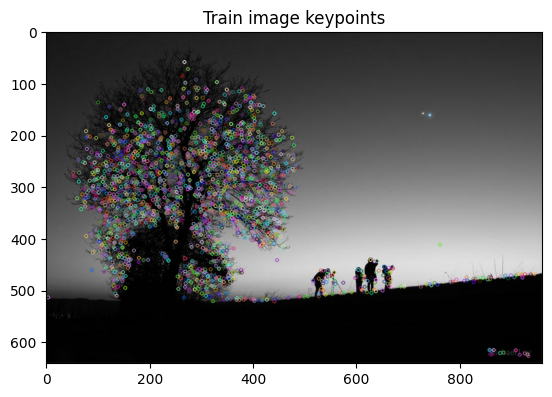

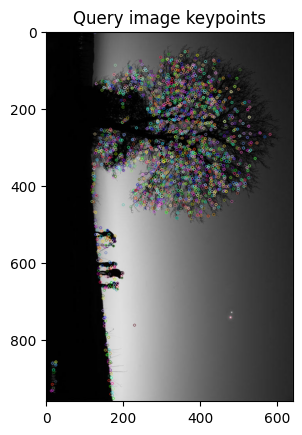

In [2]:
# SIFT implementation with OpenCV
import cv2
import numpy as np
import matplotlib.pyplot as plt

train_img = cv2.imread ('/kaggle/input/astronomy-picture-of-the-day-data-collection/apod_images/apod_images/2023-03-15.jpg')
q_img = cv2.imread ('/kaggle/input/astronomy-picture-of-the-day-data-collection/apod_images/apod_images/2023-03-15.jpg')
query_img = cv2.rotate(q_img, cv2.ROTATE_90_CLOCKWISE)

# turn images to grayscale
def to_gray (color_img):
    gray = cv2.cvtColor (color_img, cv2.COLOR_BGR2GRAY)
    return gray

train_img_gray = to_gray (train_img)
query_img_gray = to_gray (query_img)

# initialize SIFT detector
sift = cv2.SIFT_create ()

# generate SIFT keypoints and descriptors
train_kp, train_desc = sift.detectAndCompute (train_img_gray, None)
query_kp, query_desc = sift.detectAndCompute (query_img_gray, None) 

plt.figure (1)
plt.imshow ((cv2.drawKeypoints (train_img_gray, train_kp, train_img.copy ())))
plt.title ('Train image keypoints')

plt.figure (2)
plt.imshow ((cv2.drawKeypoints (query_img_gray, query_kp, query_img.copy ())))
plt.title ('Query image keypoints')

plt.show ()

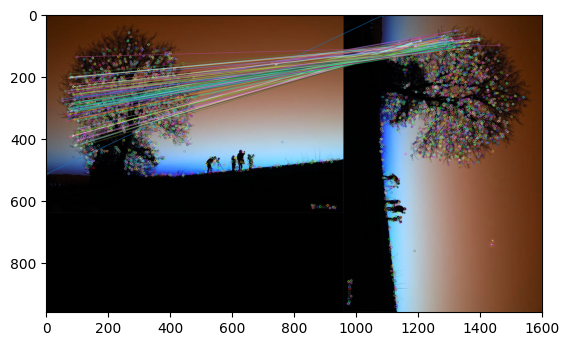

In [3]:
# create a BFmatcher object which will match up the SIFT features
bf = cv2.BFMatcher (cv2.NORM_L2, crossCheck = True)
matches = bf.match (train_desc, query_desc)

# sort the matches in the order of their distance
matches = sorted (matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches (train_img, train_kp,
                             query_img, query_kp,
                             matches [:N_MATCHES], query_img.copy (), flags = 0)

plt.figure (3)
plt.imshow (match_img)
plt.show ()

**SURF** the Speeded Up Robust Features (SURF) algorithm is a feature detection and description method for images. It is as robust and fast algorithm that is often used in computer vision applications, such as object recognition and image registration. SURF is considered to be a "speeded up" version of the Scale-Invariant Feature Transform (SIFT) algorithm. Its computational efficiency makes it more useful than SIFT for real-time applications. In SIFT, Lowe approximated Laplacian of Gaussian with Difference of Gaussian for finding scale-space. SURF goes a little further and apprroximates LoF with Box Filter. Below image shows a demonstration of such an approximation. One big advantage of this approxiamtion is that, convolution with box filter can be easily calculated with the help of integral images. And it can be done in parallel for different sclales. Also the SURF relu on determinant of Hessian matrix for both sclale and location.

**Viola-Jones** is a computer vision algorithm for object detection, specifically for detecting faces in images. It was developed by Paul Viola and Michael Jones in 2001. The algorithm uses a technique called "integral image" that allows for fast computation of Haar features, which are used to match features of typical human faces. The algorithm also uses a "cascading classifiers", which is a group of Haar-like features, to make predictions about whether a face is present in an image. The Viola-Jones algorithm is particularly efficient and is widely used in many applications such as security systems, photo tagging where computational power is limited.

**Eigenfaces** - is a computer vision algorithm that was developedin the early 1990s by researchers at MIT to recognize faces in images. The algorithm is based on the concept of eigenvectors. The algorithm first performs Principle Component Analysis (PCA) on a large set of face images, which are then used as set of "eigenfaces". The basic idea is that any face can be represented as a linear combination of these eigenfaces, and the coefficients of the linear combination can be used as a uniquie feature vector for the face.

**Histogram of Oriented Gradients (HOG)** - is a feature descriptor used in computer vision for object detection. It is used to represent the shape of an object by encoding the distriburion of intensity gradients or edge directions within an image. The basic idea behind HOG is to divide an image into small connected regions called cells, typically $ 8 \times 8$ pixels, and then compute a histogram of gradient orientations for each cell. The histograms for all the cells in the image are then concatenated to create a feature vector for the entire image. This feature vector captures information about the object's shape and texture, which can be used as input to a machine learning algorithm for object detection.

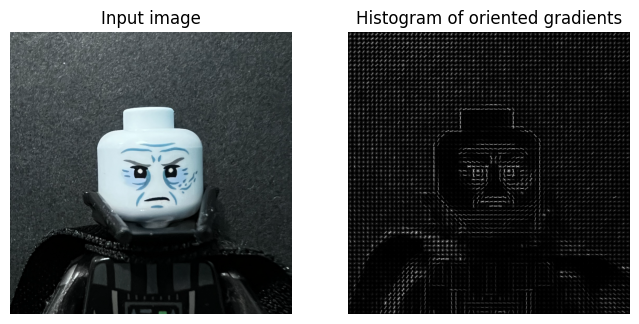

In [4]:
from skimage.feature import hog
from skimage import data, exposure

image = cv2.imread ('/kaggle/input/lego-minifigure-faces/00/0033.jpg')

fd, hog_image = hog (image, orientations = 8,
                    pixels_per_cell = (16, 16),
                    cells_per_block = (1, 1),
                    visualize = True,
                    channel_axis = - 1,)

fig, (ax1, ax2) = plt.subplots (1, 2, figsize = (8, 4), sharex = True, sharey = True)

ax1.axis ('off')
ax1.imshow (image, cmap = plt.cm.gray)
ax1.set_title ('Input image')

# rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity (hog_image, in_range = (0, 10))

ax2.axis ('off')
ax2.imshow (hog_image_rescaled, cmap = plt.cm.gray)
ax2.set_title ('Histogram of oriented gradients')
plt.show ()

**YOLO (You Only Look Once)** - is a computer vision algorithm used for object detection in images and videos. It can process images and make predictions about the objects within them in a single pass, rather than requiring multiple passes thorugh the image, as is the case with other object detection algorithms. YOLO uses a convolutional neural network (CNN) to analyze the image and make predictions about the objects within it. It divides the image into a greid of cells. If the center of an object falls into a grid cell, then that grid cell is responsible for detecting that object. Each grid cell predicts a fixed number of bounding boxes, and produces confidence scores for those boxes. This allows YOLO to make predictions about multiple objects within the same image. 

In [5]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
import utils
display = utils.notebook_init ()

YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.13 torch-2.1.2+cpu CPU


Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


In [6]:
!python classify/predict.py --weights yolov5s-cls.pt --img 224 --source data/images

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


classify/predict: weights=['yolov5s-cls.pt'], source=data/images, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.13 torch-2.1.2+cpu CPU

100%|███████████████████████████████████████| 10.5M/10.5M [00:00<00:00, 101MB/s]

Fusing layers... 
Model summary: 117 layers, 5447688 parameters, 0 gradients, 11.4 GFLOPs
image 1/2 /kaggle/working/yolov5/data/images/bus.jpg: 224x224 minibus 0.39, police van 0.24, amphibious vehicle 0.05, recreational vehicle 0.04, trolleybus 0.03, 38.2ms
image 2/2 /kaggle/working/yolov5/data/images/zidane.jpg: 224x224 suit 0.38, bow tie 0.19, bridegroom 0.18, rugby ball 0.04, stage 0.02, 30.6ms
Speed: 0.1ms pre-process, 34.4ms inference, 1.3ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/predict-cls/exp


**ResNet** - short for Residual Network is a deep convolutional neural network architecture that was developed by researchers at Microsoft in 2015. It's known for its performance on image classification and object detection tasks. The key innovation in ResNet is the use of "residual connections" between layers. This enables the network to better handle the vanishing gradient problem, which is common issue in very deep neural networks.

**Graph Cut Optimization** - grap cut algorithms are most commonly used in image segmentation to separate an image into multiple regions or segments based on color or texture. First, a network flow grapg is built based on the input image. The graph cut algorithm is a method for partitioning a graph into two or more sets of vertices (also called nodes). The goal is to minimize the number of edges that need to be cut, while ensuring that the verticesd in each subset satisfy certain conditions.

**Adaptive Image Thresholding** - adaptive thresholding can segment an image by setting all pixels whose intensity values are above a threshold to a foreground value and all the remaining pixels to a background value. The basic idea of adaptive thresholding is to use different threshold values for different regions of the image, rather than using a global threshold value for the entire image. This allows for the algorithm to take into account variations in the image's lightning and texture to produce a more accurate binary representation of the image.

In [7]:
# realised in notebook - Computer vision with OpenCV

**Lucas-Kanade** - this algorithm is a widely used method for optical flow estimation, which is the process of finding pixel-wise motions between consecutive images. The algorithm is based on the assumption that the optical flow in the local neighborhood of the pixels in an image is constant. It uses the brightness constancy assumption, meaning that the pixels in the image can move around, but their brightness cannot change. The Lucas-Kanade algorithm makes an estimate of the displacement of a neighborhood by looking at changes in pixel intensity. Such changes can be explained by the known intensity gradients of the image in that neoghborhood. Lucas-Kanade uses least-square estimation to find the optical flow of all the pixels over the neighborhood

**Kalman Filter** - is a mathematical algorithm that is commonly used to estimate the state of a system based on a series of noisy measurements. It is a recursive algorithm that uses a combination of predictions and measurements to estimate the state of the system at any point in time. These predictions are then compared to new measurements, and the algorithm uses a process called "update" to refine its estimates. Kalman Filters are commonly used in computer vision applications, in particular for object tracking tasks. Object tracking algorithms draw a bounding box across specific objects in an image, and attempt to accurately redraw this bounding box in subsequent frames, as the object moves. Kalman Filters can be used to predict the current and future positions of an object, even when it is hidden by obstacles (known as occlusion)

**Mean Shift Algorithm** - is a non-parametric, density-based clustering method for finding the regions with high density modes (i.e., high density) in a dataset. Each pixel is first assigned an initial mean, which is itsealf. The algorithm iteratively places a window around the initial mean, and calculates the new mean of all the points within that window. The process repeats until the position of the mean no longer changes significantly. The mean shift algorithm can also be extended to classify the data poitns into different clusters based in their final positions.

**Autoencoders** - autoencoders are a type of artificial neural network used for unsupervised learning. They consist of an encoder and a decoder, where the encoder maps the input data to a lower-dimensional representation (also known as the latent space or bottleneck), and the decoder maps the lower-dimensional representation back to an output. The main goal of autoencoders is to learn a compact representation of the data, which can be used for various tasks, such as dimensionality reduction, anomaly detection and generating new data samples. Autoencoders can be trained using various loss functions. An example is reconstruction loss, which measures the difference between the input and reconstructed output.

**Brute-Force Matching with ORB descriptors**

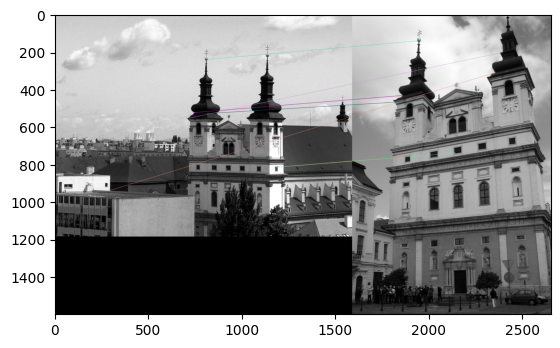

(<matplotlib.image.AxesImage at 0x7ec718e0cbb0>, None)

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread ('/kaggle/input/google-image-recognition-tutorial/building_1.jpg',
                  cv2.IMREAD_GRAYSCALE) # query image
img2 = cv2.imread ('/kaggle/input/google-image-recognition-tutorial/building_2.jpg',
                  cv2.IMREAD_GRAYSCALE) # train image

#  initiate ORB detector
orb = cv2.ORB_create ()

# find keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute (img1, None)
kp2, des2 = orb.detectAndCompute (img2, None)

# create BFMatcher object
bf = cv2.BFMatcher (cv2.NORM_HAMMING, crossCheck = True)

# match descriptors
matches = bf.match (des1, des2)

# sort them in the order of their distance
matches = sorted (matches, key = lambda x:x.distance)

# draw first 10 matches
img3 = cv2.drawMatches (img1, kp1, img2, kp2, matches [:10], None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow (img3), plt.show ()

**Brute-Force Matching with SIFT descriptors and Ratio test**

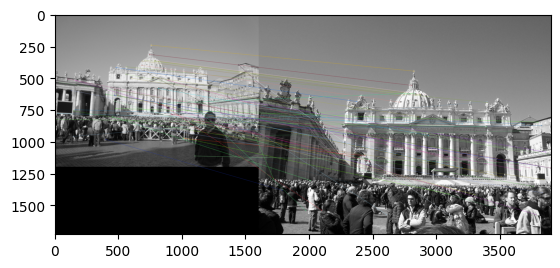

(<matplotlib.image.AxesImage at 0x7ec6db24b430>, None)

In [9]:
img1 = cv2.imread ('/kaggle/input/google-image-recognition-tutorial/roma_1.jpg',
                  cv2.IMREAD_GRAYSCALE) # query image
img2 = cv2.imread ('/kaggle/input/google-image-recognition-tutorial/roma_2.jpg',
                  cv2.IMREAD_GRAYSCALE) # train image

# initiate SIFT detector
sift = cv2.SIFT_create ()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute (img1, None)
kp2, des2 = sift.detectAndCompute (img2, None)

# BFMatcher with default params
bf = cv2.BFMatcher ()
matches = bf.knnMatch (des1, des2, k = 2)

# apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append ([m])
        
# cv2.drawMatchesKnn expects list of lists as matches
img3 = cv2.drawMatchesKnn (img1, kp1, img2, kp2, good, None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow (img3), plt.show ()

**FLANN based Matcher**

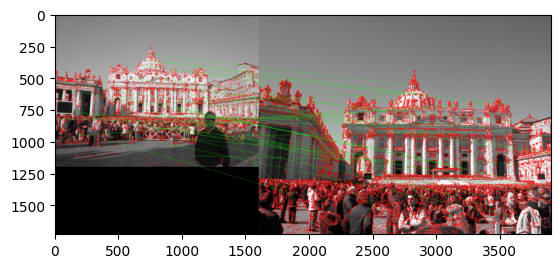

(<matplotlib.image.AxesImage at 0x7ec6db0e7ee0>, None)

In [10]:
img1 = cv2.imread ('/kaggle/input/google-image-recognition-tutorial/roma_1.jpg',
                  cv2.IMREAD_GRAYSCALE) # query image
img2 = cv2.imread ('/kaggle/input/google-image-recognition-tutorial/roma_2.jpg',
                  cv2.IMREAD_GRAYSCALE) # train image

# initiate SIFT detector
sift = cv2.SIFT_create ()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute (img1, None)
kp2, des2 = sift.detectAndCompute (img2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict (algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict (checks = 50) # or pass empty dictionary

flann = cv2.FlannBasedMatcher (index_params, search_params)

matches = flann.knnMatch (des1, des2, k = 2)

# need to draw only good matches, so create a mask
matchesMask = [[0, 0] for i in range (len (matches))]

# ratio test as per Lowe's paper
for i, (m, n) in enumerate (matches):
    if m.distance < 0.7 * n.distance:
        matchesMask [i] = [1, 0]
        
draw_params = dict (matchColor = (0, 255, 0),
                   singlePointColor = (255, 0, 0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)

img3 = cv2.drawMatchesKnn (img1, kp1, img2, kp2, matches, None, **draw_params)

plt.imshow (img3,), plt.show ()

**Preprocessing of images**

In [1]:
import tensorflow as tf
print (tf.version.VERSION)
device_name = tf.test.gpu_device_name ()
if device_name != '/device:GPU:0':
    raise SystemError ('GPU device not found')
print ('Found GPU at: {}'.format (device_name))

2024-05-15 17:59:15.171359: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 17:59:15.171467: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 17:59:15.462256: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.15.0
Found GPU at: /device:GPU:0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# helper function
def training_plot (metrics, history):
    f, ax = plt.subplots (1, len (metrics), figsize = (5 * len (metrics), 5))
    for idx, metric in enumerate (mertrics):
        ax[idx].plot (history.history [metric], ls = 'dashed')
        ax[idx].set_xlabel ('Epochs')
        ax[idx].set_ylabel (metric)
        ax[idx].plot (history.history ['val_' + metric])
        ax[idx].legend ([metric, 'val_' + metric])
    
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3
CLASS_NAMES = 'astronomy picture'.split ()

(240, 320, 3)
tf.Tensor(0.35263807, shape=(), dtype=float32)
tf.Tensor(4, shape=(), dtype=int64)
(213, 320, 3)
tf.Tensor(0.69847864, shape=(), dtype=float32)
tf.Tensor(4, shape=(), dtype=int64)
(240, 320, 3)
tf.Tensor(0.22729655, shape=(), dtype=float32)
tf.Tensor(4, shape=(), dtype=int64)
(333, 500, 3)
tf.Tensor(0.2767833, shape=(), dtype=float32)
tf.Tensor(4, shape=(), dtype=int64)
(240, 320, 3)
tf.Tensor(0.39305508, shape=(), dtype=float32)
tf.Tensor(1, shape=(), dtype=int64)


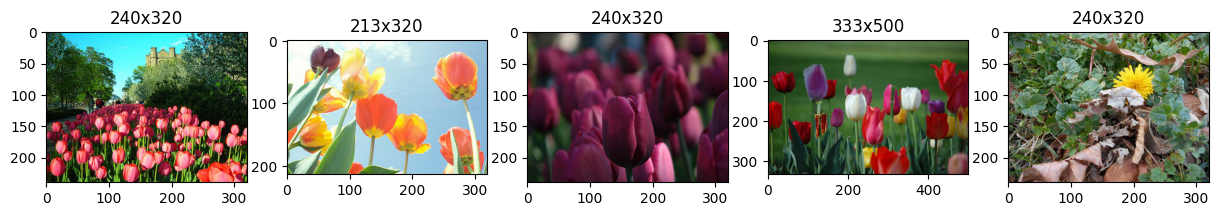

In [3]:
# reading the images
def parse_tfr (proto):
    feature_description = {
        'image': tf.io.VarLenFeature (tf.float32),
        'shape': tf.io.VarLenFeature (tf.int64),
        'label': tf.io.FixedLenFeature ([], tf.string, default_value = ''),
        'label_int': tf.io.FixedLenFeature ([], tf.int64, default_value = 0)
    }
    rec = tf.io.parse_single_example (
    proto, feature_description)
    shape = tf.sparse.to_dense (rec ['shape'])
    img = tf.reshape (tf.sparse.to_dense (rec['image']), shape)
    label_int = rec ['label_int']
    return img, label_int

train_dataset = tf.data.TFRecordDataset (
[filename for filename in tf.io.gfile.glob (
'gs://practical-ml-vision-book/flowers_tfr/train-*')], compression_type='GZIP').map (parse_tfr)

f, ax = plt.subplots (1, 5, figsize = (15, 15))
for idx, (img, label_int) in enumerate (train_dataset.take (5)):
    print (img.shape)
    mean_of_image = tf.reduce_mean (img)
    print (mean_of_image)
    print (label_int)
    ax[idx].imshow ((img.numpy ()))
    ax[idx].set_title ('{}x{}'.format (img.shape [0], img.shape [1]))

In [ ]:
! pip install --upgrade tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 17.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 50.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/

In [ ]:
preproc_layers = tf.keras.Sequential ([
    tf.keras.layers.experimental.preprocessing.Resizing (
    height = IMG_HEIGHT, width = IMG_WIDTH,
    input_shape = (None, None, 3))
])

def apply_preproc (img, label):
    # add to a batch, call preproc, remove batch
    x = tf.expand_dims (img, 0)
    x = preproc_layers (x)
    x = tf.squeeze (x, 0)
    return x, label

f, ax = plt.subplots (1, 5, figsize = (15, 15))
for idx, (img, label_int) in enumerate (train_dataset.map (apply_preproc).take (5)):
    ax[idx].imshow ((img.numpy ()))

**Transfer learning with MobileNet**

In [ ]:
import tensorflow_hub as hub
import os
# load compressed models from tensorflow_hub
os.environ ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

preproc_layes = tf.keras.Sequential ([
    tf.keras.layers.Lambda (lambda img:
                           tf.image.resize_with_pad (
                           img, 2*IMG_HEIGHT, 2*IMG_WIDTH),
                           input_shape = (None, None, 3)),
    tf.keras.layers.experimental.preprocessing.CenterCrop (
    height = IMG_HEIGHT, width = IMG_WIDTH)
])

def apply_preproc (img, label):
    # add to a batch, call preproc, remove from batch
    x = tf.expand_dims (img, 0)
    x = preproc_layers (x)
    x = tf.squeeze (x, 0)
    return x, label

# parametrize to the values in the previous cell
def train_and_evaluate (batch_size = 32, lrate = 0.001, l1 = 0., l2 = 0.,
                       num_hidden = 16):
    regularizer = tf.keras.regularizers.l1_l2 (l1, l2)
    
    train_dataset = tf.data.TFRecordDataset (
    [filename for filename in tf.io.gfile.glob (
    'gs://practical-ml-vision-book/flowers_tfr/train-*')],
    compression_type = 'GZIP').map (parse_tfr).map (apply_preproc).batch (batch_size)
    
    eval_dataset = tf.data.TFRecordDataset (
    [filename for filename in tf.io.gfile.glob (
    'gs://practical-ml-vision-book/flowers_tfr/valid-*')],
    compression_type = 'GZIP').map(parse_tfr).map(apply_preproc).batch (batch_size)
    
    layers = [hub.KerasLayer ('https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4',
                             input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
                             trainable = False, name = 'mobilenet_embedding',
                             tf.keras.layers.Dense (num_hidden, kernel_regularizer = regularizer,
                                                   activation = tf.keras.activations.relu,
                                                   name  = 'dense_hidden'),
                             tf.keras.layers.Dense (len (CLASS_NAMES),
                                                   kernel_regularizer = regularizer,
                                                   activation = 'softmax',
                                                   name = 'flower_prob'))]
    
    model = tf.keras.Sequential (layers, name = 'flower_classification')
    model.compile (optimizer = tf.keras.optimizers.Adam (learning_rate = lrate),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy (from_logits=False),
                  metrics = ['accuracy'])
    print (model.summary ())
    history = model.fit (train_dataset, validation_data = eval_dataset, epochs = 10)
    training_plot (['loss', 'accuracy'], history)
    return model

In [ ]:
model = train_and_evaluate ()